# BL40A2030 Wireless Communication Networks

## Week 5 - Assignment

### Author: [Niki Malmsten]

**1. (Scaling laws) Plot the throughput capacity for random networks with immobile nodes considering both the protocol and the physical model. Eq.(22) and (23) from [5].**

(a) What does this result mean in terms of how much bits per second can flow in the network when the number of nodes increases?

It means that as the amount of nodes increases, the amount of bits per second that can flow in the network get smaller.

(b) Cite two ways to improve the throughput capacity of wireless networks that is given in [5]. Make a brief comment with your own words about these two solutions (pro and con). 

The first way I can think of is defining boundaries. So only considering the values before a certain point which after the values get very similar. 

*Hint: The "big O" [notation](https://en.wikipedia.org/wiki/Big_O_notation) provides asymptotic boundaries of functions. In other words, what happens with the function when $n$ grows large (to infinity). It is not the function but lower and/or upper bounds. For example, the plot I wish tells that the throughput asymptotically behaves with the number of nodes in the network. In this case, the throughput capacity scales down with this number following the equations. In this sense, $W$ is a constant so one can set $W=1$ (bits/s). Note that the equations are the same, telling that they have indeed the same scaling in throughput capacity. In other words, both models have the same fundamental limit for random networks (what is not the case for arbitrary -- i.e. I decide where to put the nodes -- networks).*

**2. (Interference empirical distribution) Let us analyze the effect of the newtork size in the interference distribution for the same network density (expected number of interferers per unit of area). Follow the implementation of the "path-loss model 2" given in the tutorial. Consider the pathloss exponent $\alpha=3$, the density of $0.1$ node$/m^2$ and a square network of $L \times L$. Plot the empirical distribution for:** 

(a) $L = 5$ 

(b) $L = 10$

(c) $L = 20$

(d) $L = 100$

(e) Do you see any difference? Why?

There is a big difference. This is because when the size of network area grows, it allows the network nodes to be further from the origo, and because of the pathloss exponent, the bigger the distance the closer to zero the values get. So a long distance has physical interference being almost zero but a small distance has a pretty big physical interference.

*Hint: To keep the same density: mean_poisson = density $\times L^2$*

**3. (Outage probability) Follow the tutorial to investigate the effect of the SIR threshold $\beta$ in the outage probability, defined as (1 - success probability).**

(a) Plot the outage probability as a function of $\beta>1$ for: d=1, alpha=4, L=10, mean_poisson= 10, trials=10000. Plot $\beta$ from 1 to 15.

(b) Consider that the threshold $\beta$ is related to the channel capacity $\log_2(1+\beta)$ by treating the "interference as noise". This value indicates the maximum achieved spectral efficiency by the link in bits/s/Hz. Plot $\log_2(1+\beta)$ as a function of $\beta$, also from 1 to 15.

(c) Discuss the trade-off involved in the outage probability and the spectral efficiency that is controlled by the threshold $\beta$.

By using $\log_2(1+\beta)$ as a function of $\beta$, you get a smaller outage propability when the density grows, but the spectral efficiency is smaller compared to the function just being $\beta$. By plotting these both you notice that when having values of $\beta$ from 0 to 1, the spectral efficiency is actually better, meaning that in some cases the function $\log_2(1+\beta)$ is much better. But when the values go over 1, the spectral efficiency of the function $\beta$ is much better.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

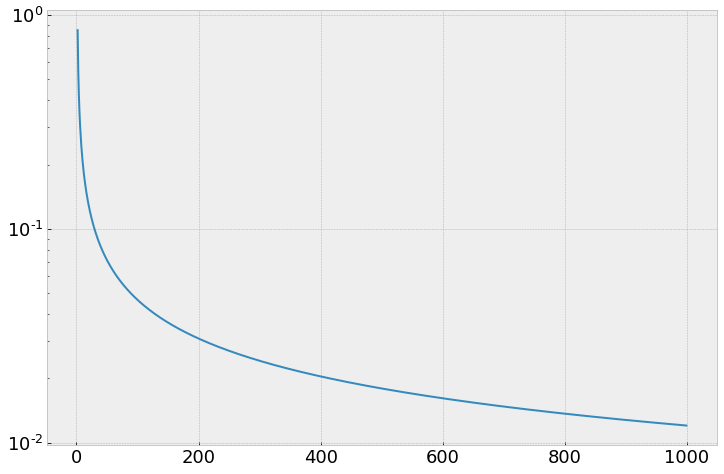

In [ ]:
n = np.arange(0,1000)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12, 8))
A = 1/np.sqrt(n*np.log(n))
plt.semilogy(n,A)
plt.show()

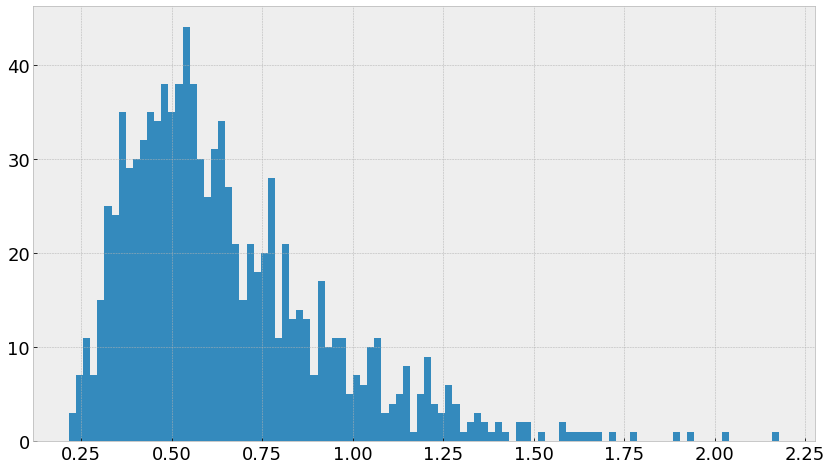

In [15]:
#Number of trials
trials = 1000
#Network size (square)
L = 20
mean_poisson = 100
#Path-loss exponent
alpha = 3
interference = np.zeros(trials)
for j in range(trials):   
    #Number of nodes
    n = np.random.poisson(mean_poisson)
    #
    #Uniform distribution in x
    position_x_realization = np.random.uniform(-L/2,L/2,n)
    #Uniform distribution in y
    position_y_realization = np.random.uniform(-L/2,L/2,n)
    ##
    #Manipulating arrays to compute distances
    position_x_realization_t = np.transpose(position_x_realization) 
    position_y_realization_t = np.transpose(position_y_realization) 
    position_final = []
    position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
    #position_final
    ###############
    #The distance to the rx1 (0,0)
    ###
    distance_rx = []
    distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
    interference_i = []
    interference_i = [(1+distance_rx[i])**(-alpha) for i in range(n)]
    interference[j] = np.sum(interference_i)

###Plot
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist(interference, bins = 100)
plt.show()

In [42]:
def suc_prob(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < d**(-alpha): 
            success = success + 1
    return success/trials

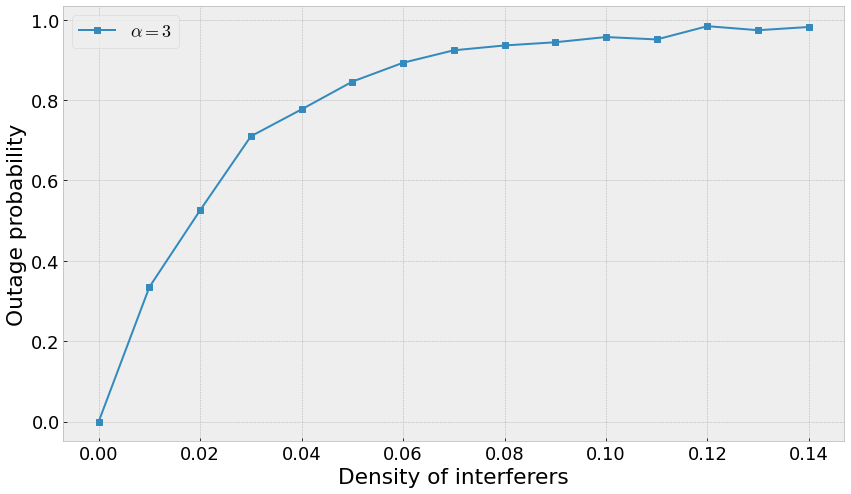

In [51]:
# Density of interferers as mean_poisson / network area
density = []
density = [i/L**2 for i in range(15)]
n_trials = 1000
suc_a2 = []
suc_a2 = [suc_prob(d=1,beta=i,alpha=3,L=10,mean_poisson= 10,trials = n_trials) for i in range(15)]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(density, np.ones(15) - suc_a2,'s-' , label=r'$\alpha=3$')
plt.xlabel("Density of interferers")
plt.ylabel("Outage probability")
plt.legend()
plt.show()

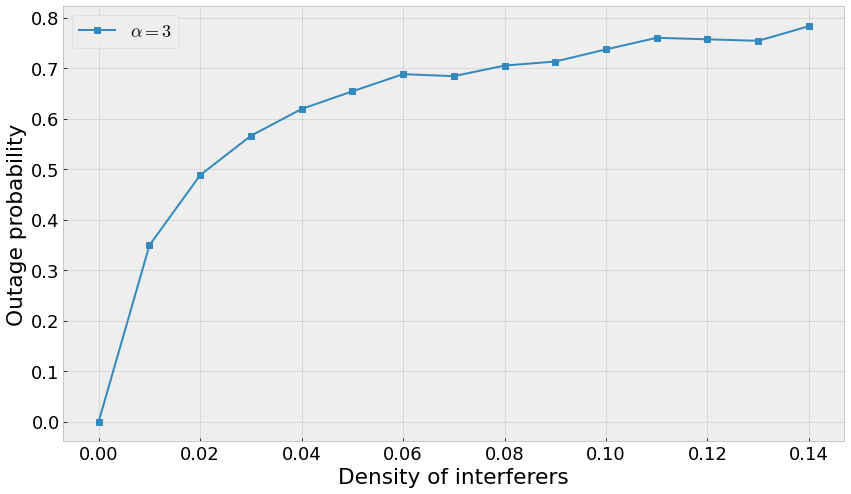

In [50]:
# Density of interferers as mean_poisson / network area
density = []
density = [i/L**2 for i in range(15)]
n_trials = 1000
suc_a2 = []
suc_a2 = [suc_prob(d=1,beta=np.log2(1+i),alpha=3,L=10,mean_poisson= 10,trials = n_trials) for i in range(15)]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(density, np.ones(15) - suc_a2,'s-' , label=r'$\alpha=3$')
plt.xlabel("Density of interferers")
plt.ylabel("Outage probability")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc035cc0-996d-4fa3-af0c-6c39ba437636' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>